# Testing the best classifier and applying for prediction of sex

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ScalerAndOneHotEncoder import ScalerAndOneHotEncoder
from sklearn.preprocessing import StandardScaler
from Filter_extreme_earns import filter_extreme_earns
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import lightgbm as lgb

import sklearn.metrics as met

from dataset_manipulation_funcs import load_filter_dataset

import pickle

import warnings

warnings.simplefilter('ignore', DeprecationWarning)

### Loading the dataset and filtering features and splitting a test set

In [2]:
categorical_features = [
    'PEIOOCC', 'A_HGA', 'PRDTRACE', 'FKIND', 'A_CLSWKR', 'A_WKSTAT', 'A_MJIND',
    'MJOCC', 'PTYN', 'LJCW', 'WEMOCG', 'MIG_CBST', 'MIGSAME',
    'H_TYPE', 'H_LIVQRT', 'GTCBSA', 'GESTFIPS', 'A_SEX'
]
numerical_features = [
    'H_NUMPER', 'FPERSONS', 'FOWNU6', 'FOWNU18', 'A_AGE', 'A_HRS1', 'A_USLHRS',
    'PHMEMPRS', 'HRSWK', 'HNUMFAM'
]
#prediction label
labels = ['ERN_VAL']
features = categorical_features + numerical_features
#Dont load the dataset again if it is already loaded (for debuging purpose)
if 'X'  not in locals():
    X, y, categorical_index = load_filter_dataset(
            'data/income_data_2017_clean_zeros.csv.bz2',
            max_ern=250000, min_ern=5000,
            categorical_features=categorical_features, 
            numerical_features=numerical_features,
            labels=labels, threshold=40000)


# Spliting to train and test
y2 = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3) 

Loading the saved best classifier

In [3]:
est = pickle.load(open( 'best_estimators/best_params_gbm_estimator_2.p', 'rb' ))
params = est['gbm_estimator']['Parameters']
estimator = lgb.LGBMClassifier(nthread=15,silent=False, **params)

Fitting to predict income

In [4]:
estimator.fit(X_train, (y_train))

LGBMClassifier(boost_from_average=True, boosting_type='gbdt',
        categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
        class_weight=None, colsample_bytree=1, is_unbalance=True,
        learning_rate=0.04, max_depth=6, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=900,
        n_jobs=-1, nthread=15, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0, reg_lambda=1, seed=777,
        silent=False, subsample=0.8, subsample_for_bin=200000,
        subsample_freq=1)

In [5]:
y_pred = estimator.predict(X_test)
print(met.confusion_matrix(y_test,y_pred, labels=[0,1]))
print(met.f1_score(y_test,y_pred))
print(met.f1_score(y_test,y_pred))

[[13454  3466]
 [ 1843  7518]]
0.7390513639714917
0.7390513639714917


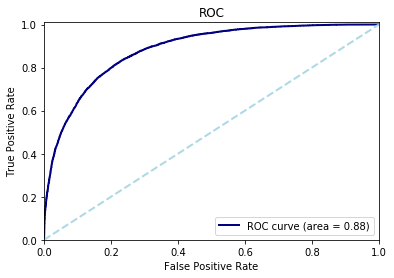

In [6]:
preds = estimator.predict_proba(X_test)[:,1]
fpr, tpr, _ = met.roc_curve(y_test, preds)

plt.figure()
lw = 2
auc = met.auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',
         lw=lw, label='ROC curve (area = {:0.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Loading the data, this time the labels are the persons' sex (0 male 1 female)

In [7]:
# Import the dataset
del X
categorical_features = [
    'PEIOOCC', 'A_HGA', 'PRDTRACE', 'FKIND', 'A_CLSWKR', 'A_WKSTAT', 'A_MJIND',
    'MJOCC', 'PTYN', 'LJCW', 'WEMOCG', 'MIG_CBST', 'MIGSAME',
    'H_TYPE', 'H_LIVQRT', 'GTCBSA', 'GESTFIPS'
]
numerical_features = [
    'H_NUMPER', 'FPERSONS', 'FOWNU6', 'FOWNU18', 'A_AGE', 'A_HRS1', 'A_USLHRS',
    'PHMEMPRS', 'HRSWK', 'HNUMFAM', 'PEIOOCC'
]
#prediction label
labels = ['A_SEX']
features = categorical_features + numerical_features
#Dont load the dataset again if it is already loaded (for debuging purpose)
if 'X'  not in locals():
    X, y, categorical_index = load_filter_dataset(
            'data/income_data_2017_clean_zeros.csv.bz2',
            max_ern=250000, min_ern=5000,
            categorical_features=categorical_features, 
            numerical_features=numerical_features,
            labels=labels, threshold=1)


# Spliting to train and test
y2 = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3) 

Fitting the classifier (without adjusting metaparameters)

In [8]:
estimator.fit(X_train, (y_train))

LGBMClassifier(boost_from_average=True, boosting_type='gbdt',
        categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
        class_weight=None, colsample_bytree=1, is_unbalance=True,
        learning_rate=0.04, max_depth=6, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=900,
        n_jobs=-1, nthread=15, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0, reg_lambda=1, seed=777,
        silent=False, subsample=0.8, subsample_for_bin=200000,
        subsample_freq=1)

### The f-1 score is pretty good

In [9]:
y_pred = estimator.predict(X_test)
print(met.confusion_matrix(y_test,y_pred, labels=[0,1]))
print(met.f1_score(y_test,y_pred))

[[12139  1889]
 [ 1797 10456]]
0.8501504187332304


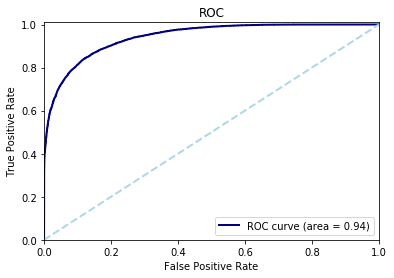

In [10]:
preds = estimator.predict_proba(X_test)[:,1]
fpr, tpr, _ = met.roc_curve(y_test, preds)

plt.figure()
lw = 2
auc = met.auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',
         lw=lw, label='ROC curve (area = {:0.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()